<a href="https://colab.research.google.com/github/bitprj/DigitalHistory/blob/Shayan/Week7-Visualizations-and-Exploratory-Analysis-using-Seaborn-and-Pandas/homework/Week7-Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <div align="center">Week 7 - Homework</div>

# <div align="center">Analysing the Graduates of 2019</div>

Welcome to Week 7! The goal of this homework is to use visualizations to explore questions from the dataset. Some of the questions we will explore include:
- Is there a correlation between higher unemployment rates, median and the gendery majority in a major. (Box plots)
- Do students in more popular majors make more money? (Use scatterplots)
- How many majors are predominantly male? Predominantly female? (Use histograms)

While we can use the pandas interface with matplotlib for plotting data that is stored in Series and DataFrame objects, we will focus instead on using seaborn, which is a high-level library for making statistical graphics in Python that is built upon matplotlib and closely integrated with pandas.

|  Questions                                      |Count|     
|-------------------------------------------------|-----|
|<div align="left">Mystery Question</div>        | 1   |
|<div align="left">Box plots</div>                | 2   |
|<div align="left">Distribution graphs</div>      | 3   |
|<div align="left">Scatter graphs</div>           | 4   |


## About the Dataset
we work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was collected and aggregated by the American Community Survey, though the set we will be using is the cleaned version from FiveThirtyEight. Each row represents a different college major and contains information on things such as gender diversity, employment rates, median salaries, and more. The columns in the dataset are as follows.

| <div align="center">Columns</div>                 | <div align="left">Description</div> |
|---------------------|--------------------------------------------------------------------------|
|<div align="center">Rank</div>                 | <div align="left">Rank by median earnings. Note that the dataset is ordered by this column</div> |
|<div align = "center">Major_code</div>           | <div align="left">Major code.|
|<div align = "center">Major</div>                | <div align="left">Major description.|
|<div align = "center">Major_category</div>       | <div align="left">Category of major                 |
|<div align = "center">Total</div>                | <div align="left">Total number of people with major.|
|<div align = "center">Sample_size</div>          | <div align="left">Sample size (unweighted) of full-time, year-round workers only, who reported earnings of at least $1. This sample is used for computing the earnings columns Median, P25th, and P75th for each major.|
|<div align="center">Men</div>                  | <div align="left">Number of male graduates.|
|<div align="center">Women</div>                | <div align="left">Number of female graduates.|
|<div align="center">ShareWomen</div>           | <div align="left">Proportion of women as share of total.|
|<div align="center">Employed</div>             | <div align="left">Number employed in civilian jobs.|
|<div align="center">Full_time</div>            | <div align="left">Number employed who work 35 hours or more per week.|
|<div align="center">Part_time</div>            | <div align="left">Number employed who work less than 35 hours per week|
|<div align="center">Full_time_year_round</div> | <div align="left">Number employed at least 50 weeks of the year and work at least 35 hours per week.|
|<div align = "center">Unemployed</div>        | <div align="left">Number unemployed (not employed or in the armed forces and actively looking for work)|
|<div align = "center">Unemployment_rate</div> | <div align="left">(Number Unemployed) / (Number Unemployed + Number Employed).|
|<div align = "center">Median</div>            | <div align="left">Median earnings of full-time, year-round workers, in USD.|
|<div align = "center">P25th</div>             | <div align="left">25th percentile of earnings of full-time, year-round workers, in USD.|
|<div align = "center">P75th</div>             | <div align="left">75th percentile of earnings of full-time, year-round workers, in USD.|
|<div align="center">College_jobs</div>      | <div align="left">Number with job requiring a college degree.|
|<div align="center">Non_college_jobs</div>  | <div align="left">Number with job not requiring a college degree.|
|<div align="center">Low_wage_jobs</div>     | <div align="left">Number in low-wage service jobs.|


## Grading

This Home work has 10 Questions. Each question is worth half a point. If a question has two parts, the points are divided equally

## Load the Libraries and Dataset

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
recent_grads = pd.read_csv('../data/recent-grads.csv')

In [ ]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [ ]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [ ]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

### Importance of Sample Size

Sample size can be a very important distinguishing factor in order results. What it highlights is the number of people who were actually interviewed for that specific major. In order case the sample size is not an event distribution and varys for for every major.

## New methods introduced in this Homework

#### New Way to declare subplots

Previously if we were to make subplots we would follow the method:
```
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

```
and in order to present a seaborn or pandas in a subplot we would add
```ax = ax1``` as a parameter in the the ```sns.plot()``` or ```df.plot()```

Now were are going to use something that involves less code and is a fairly easy implementation

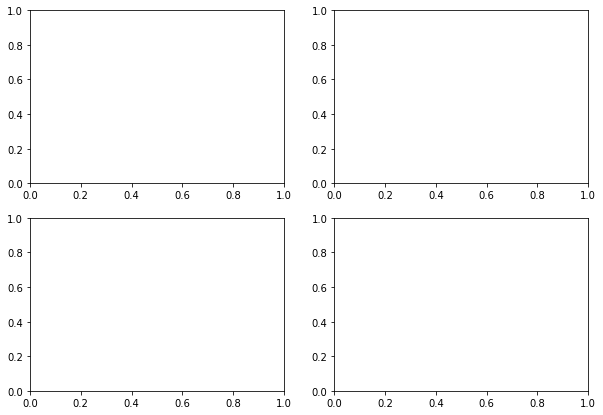

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

we run the code ```plt.subplots``` and declare parameters inside ```nrows``` and ```ncols``` set to ```2```. We also declared ```figsize``` to ```(10,7)``` (inches).

The code above returns two objects that we store as variables: 
- The first is the whole figure which we store as ```fig```. 
- The second one is every subplot stored as one variable ```axes```. 

This might sound confusing but basically bove we declared a 2 x 2 matrix of subplots. Therefore, through ```axes```, all four sublot plots inside ```fig``` are are a specific position in a matrix.


If we want to place a plot inside one of those subplots, we simple call use the following:

In the example below, I have used the pandas ```df.plot()``` method to print ```Total``` vs ```Part_time```. Focus on the last paramter declared. ```ax``` = ```axes[1,1]```, means that we are telling it to place the scatter plot on the cell in the 2nd row and 2nd column. (Note: when we declare nrows = 2 and ncols = 2, python is creating a matrix starting from 0, which is a digit in programming). The matrix essentially is like this:

|  |0    | 1   |
|--|-----|-----|
|0 |[0,0]|[0,1]|
|1 |[1,0]|[1,1]|

/Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/shay

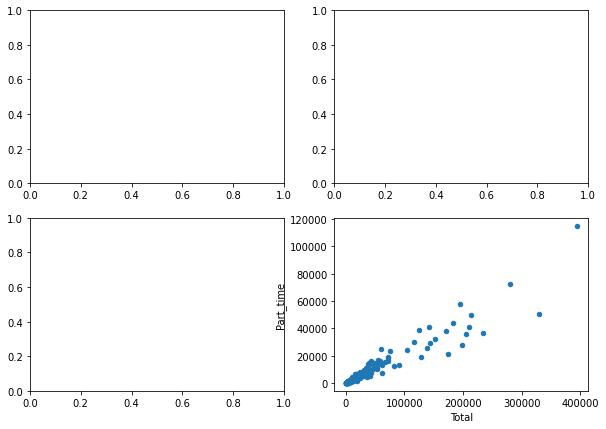

In [ ]:
recent_grads.plot(x = 'Total',y = 'Part_time',kind = 'scatter',ax = axes[1,1])
fig

### Using ```axhline``` and ```axvline```

The first two blocks of are already familiar to you now, lets look into the third and fourth.

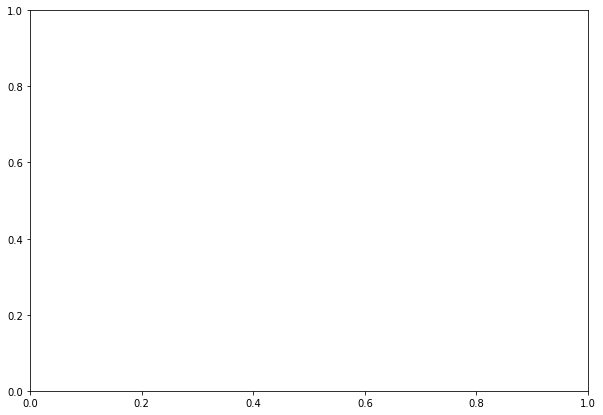

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

In [ ]:
sns.scatterplot(x = "Sample_size",
                y = "Unemployment_rate",
                data = recent_grads,
                ax= ax)

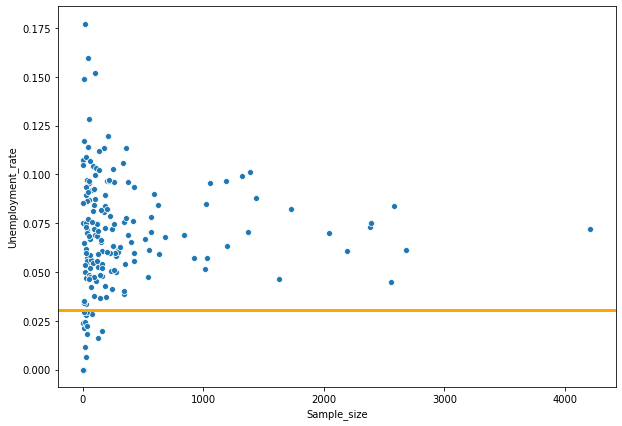

In [ ]:
ax.axhline(y = recent_grads["Unemployment_rate"].std(),
           color = "orange",
           linestyle = "-",
           linewidth = 3,
          label = "Standard Deviation Sample Size")
fig

Over here we have introduced a new method called ```axhline```.
This functions adds a horizontal line across the axis.

Note: We have attached the object to ```ax``` because we want to print it on the same graph.

The paramters declared inside are:
- ```y``` 
- ```color``` 
- ```linestyle```
- ``` linewidth```
- ```label```

While you may be familiar with the latter 4, we have added a property to our dataframe column in the ```y``` parameter. In the case above we have added ```std()``` to the column ```recent_grads["Unemployment_rate"]```. This is doable because the column itself is an object and we are finding it's standard deviation. Similarly we can plot properties such as ```mean()```, ```median()``` etc. n short we can use this method to plot the proprties shown through ```df.describe()```

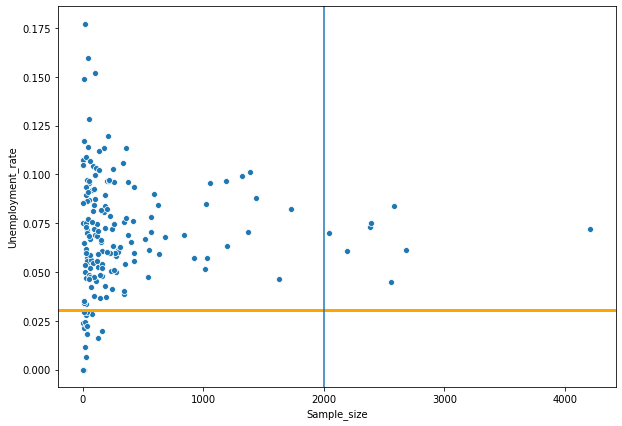

In [ ]:
ax.axvline(x = 2000, linestyle = "-")
fig

The second method we have added to our plot is the ```axvline``` method. This simple plots a vertical line to the position we have declared on the graph. For example in the case above we have declared the ```x``` value as 2000.

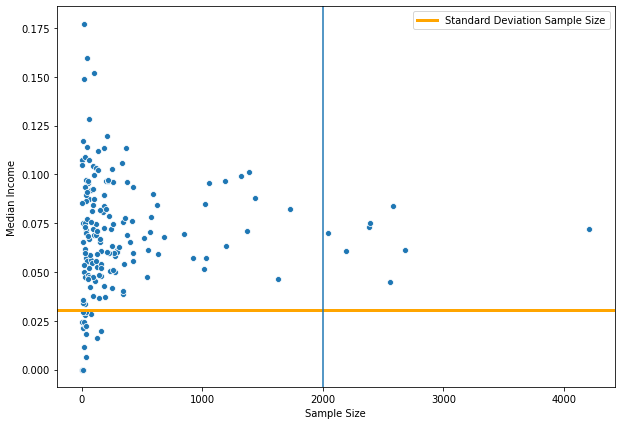

In [ ]:
ax.legend(loc = "best")

ax.set(xlabel = "Sample Size",
       ylabel = "Median Income");
fig

## Q1. Mystery Question



In order to get one of your graphs to be displayed without error, you will have to perform a step which involves cleaning your dataset. 


In [ ]:
# INSERT CODE HERE
recent_grads.dropna(inplace = True)
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


## Box Plots

For this sections you will be drawing 2 box plots. using a category we made in the tutorial for Week 7, 'Gender Majority'.

In [ ]:
def majorityWomen(x):
    if x > .50:
        return 'Majority Women'
    else:
        return 'Majority Men'

recent_grads['Gender Majority'] = recent_grads['ShareWomen'].apply(majorityWomen)

### Q2. Gender Majority vs Median

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))
sns.# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

NameError: name 'plt' is not defined

### Q3. Gender Majority vs Unemployment Rate

In [ ]:
sns.# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

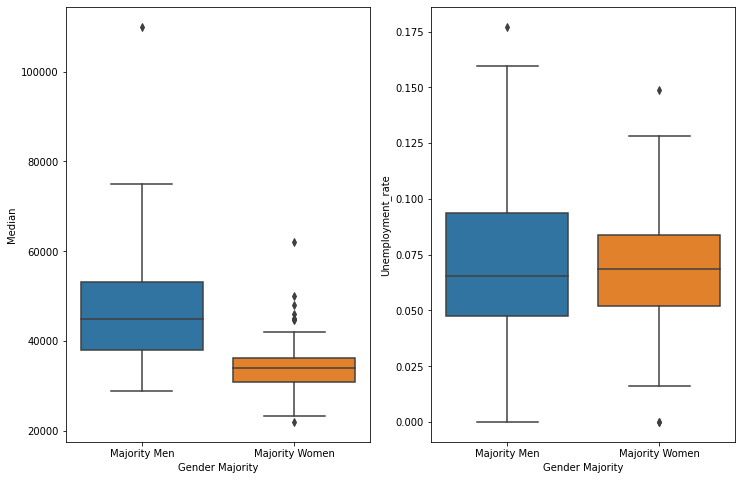

In [ ]:
fig

## Distribution Plots


### Q4. Plotting the labour force count

For the following parts you will:
- Using the ```subplot``` method above, create a ```2``` by ```2``` matrix with a ```figsize``` of ```(14,10)```
- Plot distributions plots for ```Total```, ```Share_women```,```Men```,```Women``` as subplots.
- Declare a paramter ```kde``` and set it to ```False``` (*This is because we are only plotting histograms*)


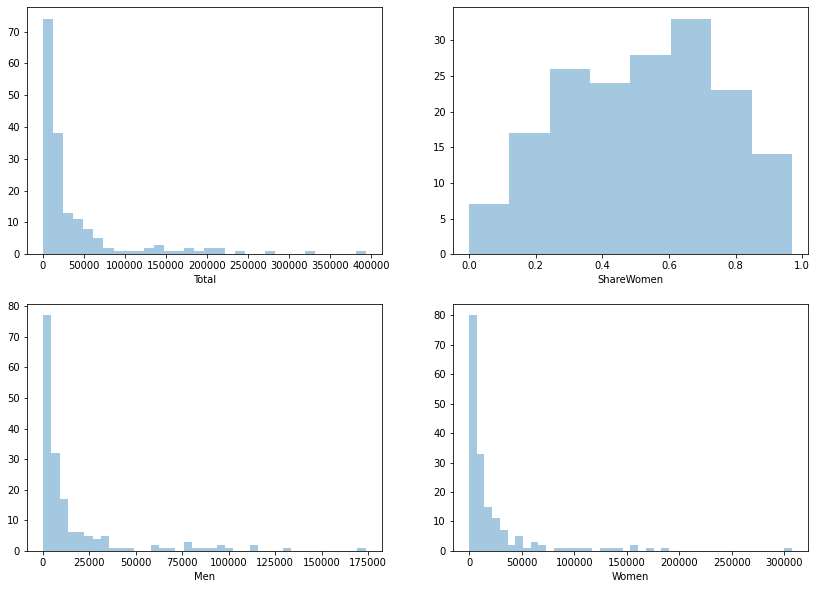

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10)) # INSERT CODE HERE

# Total
sns.# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# ShareWomen
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        

# Men
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Women
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

### Q5. Plotting the active and inactive labour force

For this part repeat the steps in the previous question however, plot new columns, ```Median```, ```Unemployment_rate```, ```Employed```, ```Full_time```.

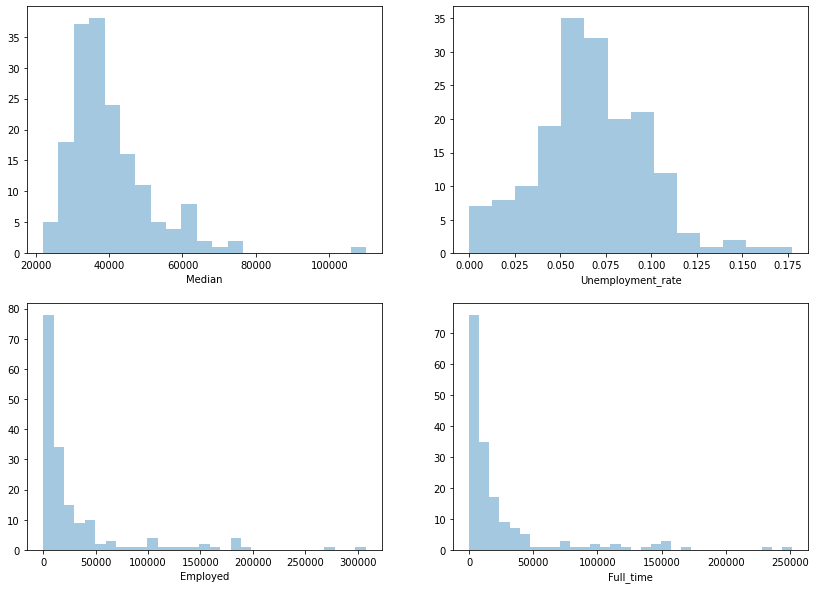

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))

# Median
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Unemployment_rate
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Employed
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Full_time
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

### Q6. Analysis for fewer than 50,000 Graduates

For this question, plot the labour force statistics, with respect to major, where the ```Total``` number of graduates is *less* than ```50000``` are only plotted. There are multiple ways to approach this question. You can create a new dataframe for ```Total``` < ```5000```. Another way to approach this question is by taking advantage of the ```df.loc``` method. We also want to view the kernel density (kde) plots in these ```distplots```.


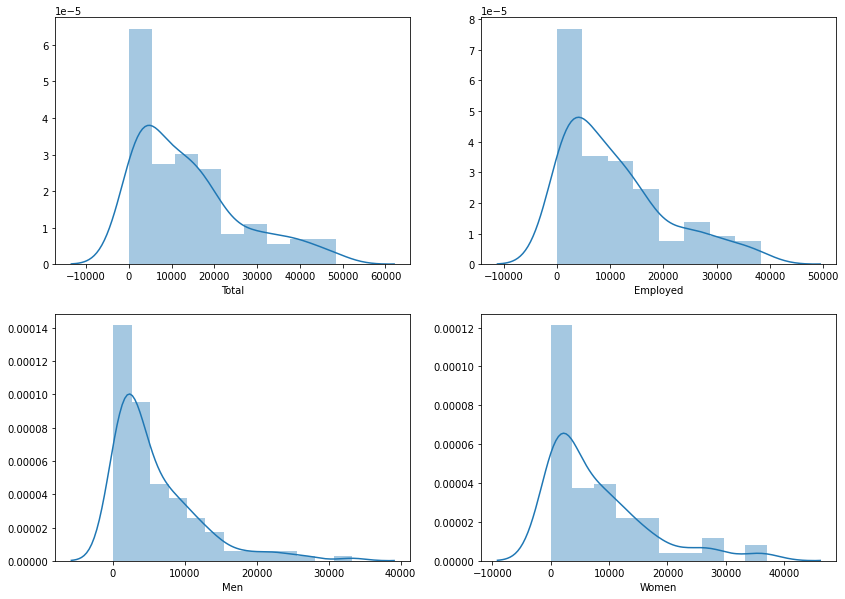

In [ ]:

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

## Scatter plots

### Q7. Visualizing the Un-employment 

In this question you will:
- Plot the ```sample size``` vs the ```unemployment rate```.
- Add ```Median``` as a third paramter
- On the same graph add a line showing the ```median``` ```unemployment rate```. You should also set a ```color```, ```linestyle```, ```linewidth``` and ```label```

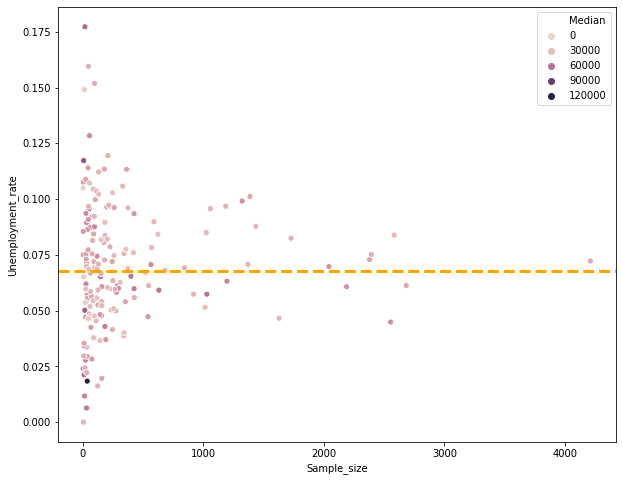

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))


sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )



### Q6. Share of Women vs Unemployment

In ths question:
- Plot the Share of Women vs Unemployment rate.
- Add Gender Majority as the third parameter.
- Additionally add ```axhline``` with respect to the mean of the unemployment. Use ```:``` as the ```linestyle```.


**Note**: You will also have to add a legend.

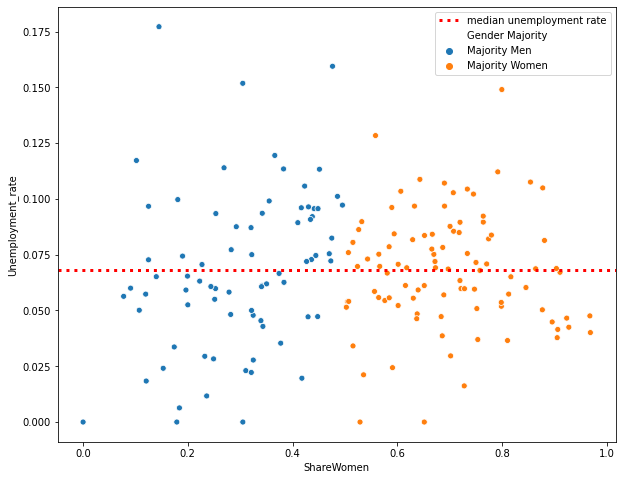

In [ ]:
fig,ax = plt.subplots(figsize = (10, 8))

sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.legend(# INSERT CODE HERE


### Q7. Share of Women vs Median Size

In ths question:
- Plot the share of women vs median.
- Add sample size as the third parameter.
- Additionally add ```axhline``` with respect to the mean of the unemployment. Use ```:``` as the ```linestyle```.
- Add ```axvline``` and set it to the center of the x-axis. Use ```:``` as the ```linestyle```.


**Note**: You will also have to add a legend.

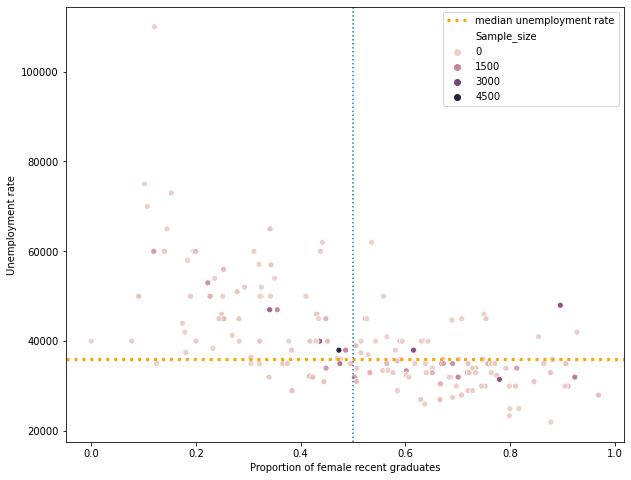

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))


sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.axvline(# INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.legend(# INSERT CODE HERE



### Q8. Share of Women vs Full time (year round)

In ths question:
- Plot the share of women vs full time year round.
- Add Major category as the third parameter and ```Women``` as the 4th paramter

(0.0, 1.0)

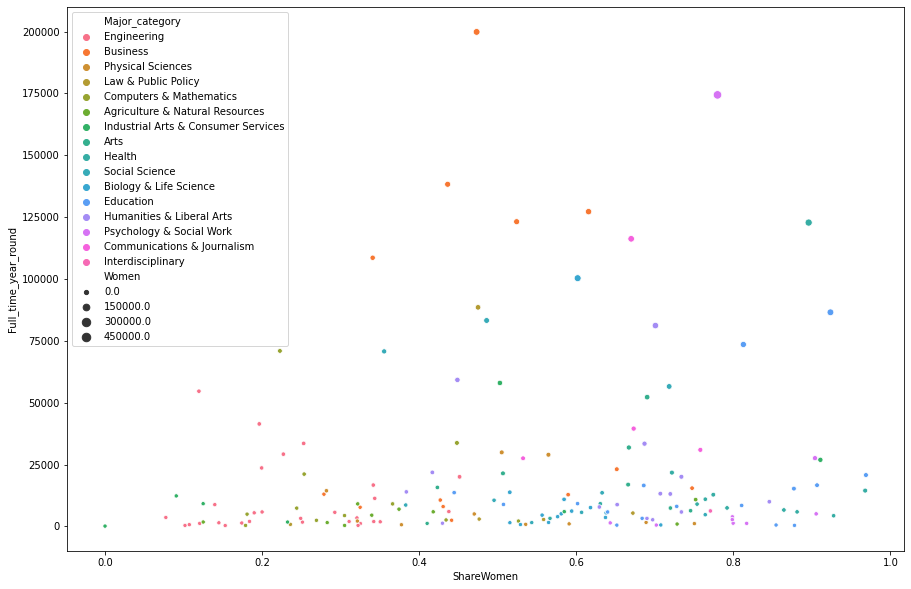

In [ ]:
fig = plt.figure(figsize = (15,10))

sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.set_title(# INSERT CODE HERE

ax.set_ylim(0, 120000)
ax.set_xlim(0, 1.0)
